###  Load Data

In [4]:
# import libreries

import pandas as pd
import numpy as np
import nltk
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from sklearn import svm
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from  sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
import seaborn as sns

In [2]:
df =  pd.read_csv("./data/Emotion_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [35]:
df.head(10)

Text   Emotion
0                            i didnt feel humiliated   sadness
1  i can go from feeling so hopeless to so damned...   sadness
2   im grabbing a minute to post i feel greedy wrong     anger
3  i am ever feeling nostalgic about the fireplac...      love
4                               i am feeling grouchy     anger
5  ive been feeling a little burdened lately wasn...   sadness
6  ive been taking or milligrams or times recomme...  surprise
7  i feel as confused about life as a teenager or...      fear
8  i have been with petronas for years i feel tha...     happy
9                                i feel romantic too      love

In [36]:
df.shape

(21459, 2)

In [37]:
corpus = df.Text
targets = df.Emotion

In [39]:
stop_words = nltk.corpus.stopwords.words("english")
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in df.Text])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [40]:
vectorizer = CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))

In [41]:
X = vectorizer.fit_transform(corpus)

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [19]:
print(X.shape)
print(len(corpus))
print(len(vectorizer.get_feature_names()))

(21459, 143013)
21459
143013


### Plot for word frequency

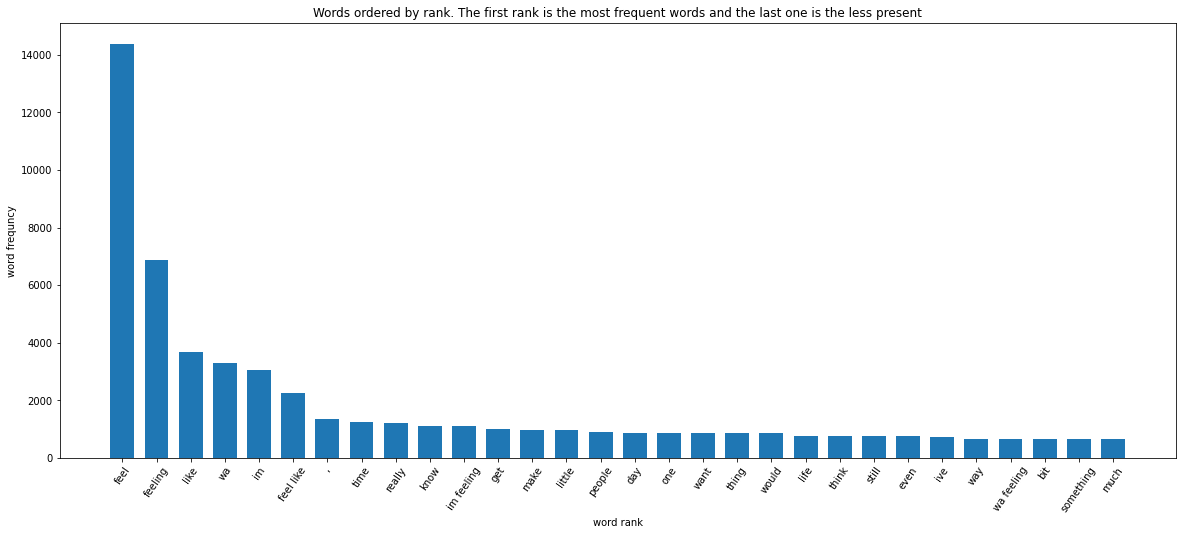

In [20]:
# Compute rank
words = vectorizer.get_feature_names()
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present");

### Split set

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train))
print("x_test :", np.size(x_test))
print("ratio :", round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100))

x_train : 304893
x_test : 76635
ratio : 20


### Logistic regression

In [30]:
logistic_regression = LogisticRegression(max_iter =1000)
logistic_regression.fit(x_train, y_train)

# Prediction
pred = logistic_regression.predict(x_test)

# percent score
score = logistic_regression.score(x_test, y_test)
print(round(score, 3))

0.901


In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.90      0.89      0.90       600
        fear       0.89      0.84      0.87       526
       happy       0.90      0.94      0.92      1399
        love       0.85      0.78      0.81       325
     sadness       0.92      0.95      0.93      1258
    surprise       0.83      0.67      0.74       184

    accuracy                           0.90      4292
   macro avg       0.88      0.85      0.86      4292
weighted avg       0.90      0.90      0.90      4292



In [32]:
#test
print(logistic_regression.predict(X[2]))
print(logistic_regression.predict(X[30]))

['anger']
['happy']


### SVM

In [23]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
pred = clf.predict(x_test)

In [25]:
score = clf.score(x_test, y_test)
print(round(score, 3))

0.792


In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.92      0.63      0.75       600
        fear       0.86      0.61      0.72       526
       happy       0.72      0.96      0.82      1399
        love       0.91      0.41      0.56       325
     sadness       0.81      0.92      0.86      1258
    surprise       0.95      0.32      0.48       184

    accuracy                           0.79      4292
   macro avg       0.86      0.64      0.70      4292
weighted avg       0.82      0.79      0.78      4292



### SVM One Vs One Classifier Linear SVC

In [44]:
oneVsOne = OneVsOneClassifier(LinearSVC())
oneVsOne.fit(x_train, y_train)
pred = oneVsOne.predict(x_test)

score = oneVsOne.score(x_test, y_test)
print('Socre : ',round(score, 3))

Socre :  0.895


In [28]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       anger       0.92      0.63      0.75       600
        fear       0.86      0.61      0.72       526
       happy       0.72      0.96      0.82      1399
        love       0.91      0.41      0.56       325
     sadness       0.81      0.92      0.86      1258
    surprise       0.95      0.32      0.48       184

    accuracy                           0.79      4292
   macro avg       0.86      0.64      0.70      4292
weighted avg       0.82      0.79      0.78      4292



In [34]:
#test
print(oneVsOne.predict(X[2]))
print(oneVsOne.predict(X[30]))

['anger']
['happy']


### Confusion matrix

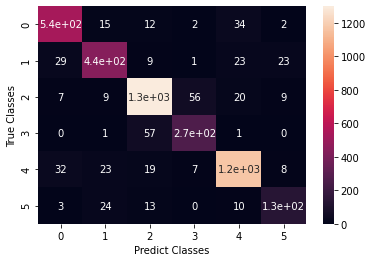

In [46]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Compare other multiclasses regression with pipline

In [3]:

from time import time
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation

import nltk


In [50]:
# GLOBAL VARIBLES
df =  pd.read_csv("./data/Emotion_final.csv")
stopwords = nltk.corpus.stopwords.words("english")
corpus = np.array(df['Text'])
targets = np.array(df['Emotion'])

In [5]:
def tokenize(text):
    text = ''.join([ch for ch in text if ch not in df.Text])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [62]:
pipe0 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('svml', LinearSVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words,tokenizer=tokenize, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
def run_pipes(pipes, splits=10, test_size=0.2, seed=0):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average = 'micro'),
                precision_score(y_test, y,average='micro'),
                recall_score(y_test, y, average='micro')
                
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": arr[:,1].mean().round(3),
            "Precision" : arr[:,2].mean().round(3),
            "Recall" : arr[:,3].mean().round(3)
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

In [65]:
# run base pipes withtout tfid
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5], splits=1)

In [66]:
print_table(res)

time  f1_score  Precision  Recall
vect-sgd      20.04     0.904      0.904   0.904
vect-svml     24.89     0.906      0.906   0.906
vect-mult_nb  19.50     0.739      0.739   0.739
vect-bern_nb  19.55     0.582      0.582   0.582
vect-logit    43.07     0.901      0.901   0.901

In [67]:
# run bas pipes with tfid
res1 = run_pipes([pipe6, pipe7, pipe8, pipe9], splits=1)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might

In [68]:
print_table(res1)

time  f1_score  Precision  Recall
vect-tfidf-svml     20.61     0.899      0.899   0.899
vect-tfidf-bern_nb  19.97     0.586      0.586   0.586
vect-tfidf-mult_nb  19.87     0.649      0.649   0.649
vect-tfidf-logit    45.39     0.849      0.849   0.849

###  Load data set 

In [43]:
df1 =  pd.read_csv("./data/text_emotion.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [71]:
df1.head(10)

tweet_id  ...                                            content
0  1956967341  ...  @tiffanylue i know  i was listenin to bad habi...
1  1956967666  ...  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696  ...                Funeral ceremony...gloomy friday...
3  1956967789  ...               wants to hang out with friends SOON!
4  1956968416  ...  @dannycastillo We want to trade with someone w...
5  1956968477  ...  Re-pinging @ghostridah14: why didn't you go to...
6  1956968487  ...  I should be sleep, but im not! thinking about ...
7  1956968636  ...               Hmmm. http://www.djhero.com/ is down
8  1956969035  ...            @charviray Charlene my love. I miss you
9  1956969172  ...         @kelcouch I'm sorry  at least it's Friday?

[10 rows x 4 columns]

In [72]:
number_emotion1 = df1.groupby("sentiment").count()
number_emotion1

tweet_id  author  content
sentiment                            
anger            110     110      110
boredom          179     179      179
empty            827     827      827
enthusiasm       759     759      759
fun             1776    1776     1776
happiness       5209    5209     5209
hate            1323    1323     1323
love            3842    3842     3842
neutral         8638    8638     8638
relief          1526    1526     1526
sadness         5165    5165     5165
surprise        2187    2187     2187
worry           8459    8459     8459

### Vectorizing 


In [44]:
corpus1 = df1.content
targets1 = df1.sentiment

In [45]:
stop_words = nltk.corpus.stopwords.words("english")

In [46]:
vectorizer1 = CountVectorizer(stop_words = stop_words, ngram_range= (1, 2))

In [47]:
X1 = vectorizer1.fit_transform(corpus1)

In [53]:
X1.shape

(40000, 253407)

Text(0.5, 1.0, 'Words ordered by rank. The first rank is the most frequent words and the last one is the less present')

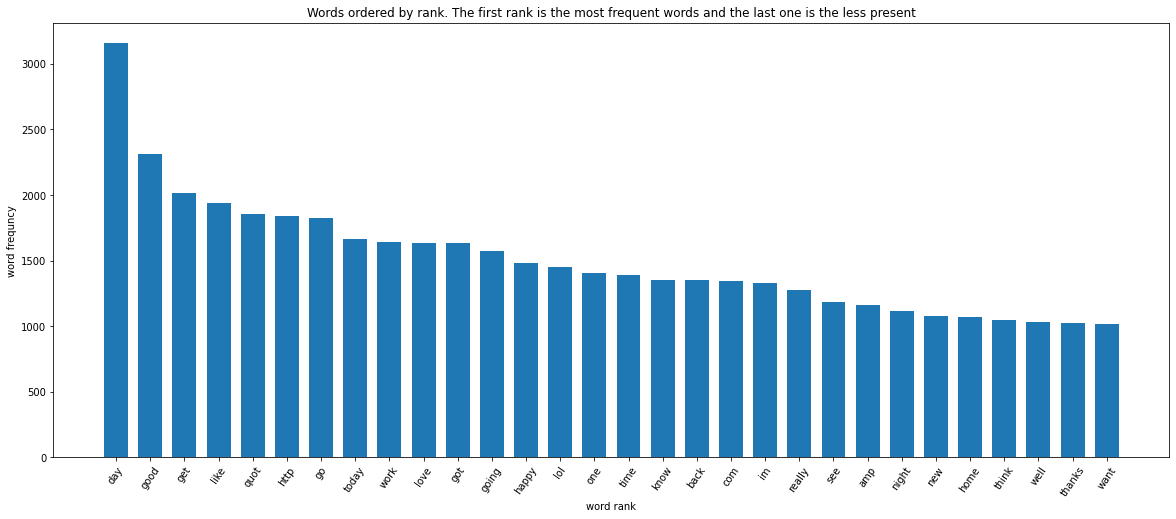

In [107]:
words = vectorizer1.get_feature_names()
wsum = np.array(X1.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present")

### Split set

In [48]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, targets1, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train))
print("x_test :", np.size(x_test))
print("ratio :", round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100))

x_train : 304892
x_test : 76635
ratio : 20


### Logistic regression

In [49]:
logistic_regression1 = LogisticRegression(max_iter =1000)
logistic_regression1.fit(x_train1, y_train1)

# Prediction
pred1 = logistic_regression1.predict(x_test1)

# percent score
score = logistic_regression1.score(x_test1, y_test1)
print(round(score, 3))

0.34


In [50]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.10      0.01      0.01       147
  enthusiasm       0.00      0.00      0.00       147
         fun       0.21      0.06      0.09       354
   happiness       0.32      0.32      0.32      1052
        hate       0.33      0.13      0.18       251
        love       0.51      0.40      0.45       780
     neutral       0.34      0.59      0.43      1743
      relief       0.19      0.05      0.08       292
     sadness       0.34      0.27      0.30      1062
    surprise       0.16      0.04      0.06       422
       worry       0.33      0.40      0.36      1694

    accuracy                           0.34      8000
   macro avg       0.22      0.17      0.18      8000
weighted avg       0.32      0.34      0.31      8000



/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [84]:
clf1 = svm.SVC()
clf1.fit(x_train1, y_train1)
pred1 = clf1.predict(x_test1)
score = clf1.score(x_test1, y_test1)
print(round(score, 3))

0.338


In [85]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.00      0.00      0.00       147
  enthusiasm       0.00      0.00      0.00       147
         fun       0.00      0.00      0.00       354
   happiness       0.34      0.34      0.34      1052
        hate       0.40      0.08      0.13       251
        love       0.57      0.35      0.43       780
     neutral       0.33      0.61      0.43      1743
      relief       0.25      0.01      0.01       292
     sadness       0.42      0.13      0.20      1062
    surprise       0.27      0.01      0.02       422
       worry       0.30      0.50      0.37      1694

    accuracy                           0.34      8000
   macro avg       0.22      0.16      0.15      8000
weighted avg       0.33      0.34      0.29      8000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM OneVsOne Classifier

In [81]:
oneVsOne1 = OneVsOneClassifier(LinearSVC())
oneVsOne1.fit(x_train1, y_train1)
pred1 = oneVsOne1.predict(x_test1)

score = oneVsOne1.score(x_test1, y_test1)
print('Socre : ',round(score, 3))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Socre :  0.327


In [82]:
print(classification_report(y_test1, pred1))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        37
       empty       0.03      0.01      0.01       147
  enthusiasm       0.04      0.01      0.01       147
         fun       0.17      0.07      0.10       354
   happiness       0.33      0.32      0.32      1052
        hate       0.32      0.16      0.22       251
        love       0.47      0.40      0.43       780
     neutral       0.34      0.56      0.42      1743
      relief       0.15      0.08      0.10       292
     sadness       0.31      0.25      0.28      1062
    surprise       0.15      0.06      0.09       422
       worry       0.32      0.36      0.34      1694

    accuracy                           0.33      8000
   macro avg       0.20      0.17      0.18      8000
weighted avg       0.30      0.33      0.31      8000



### Confusion matrix

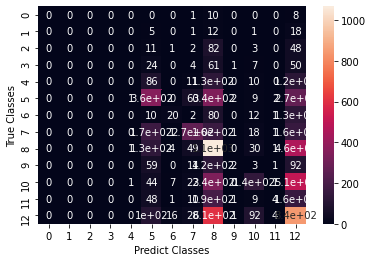

In [86]:
sns.heatmap(confusion_matrix(y_test1, pred1), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Use pipline

In [54]:
pipe0 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('svml', LinearSVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])
pipe6 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
def run_pipes1(pipes, splits=10, test_size=0.2, seed=0):  
    res2 = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus1):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train1 = corpus1[idx_train]
            X_test1 = corpus1[idx_test]
            y_train1 = targets1[idx_train]
            y_test1 = targets1[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train1, y_train1)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test1)
            res2[name].append([
                fit_time,
                f1_score(y_test1, y, average = 'micro'),
                precision_score(y_test1, y,average='micro'),
                recall_score(y_test1, y, average='micro')
            ])
    return res2

def print_table1(res2):
    # Compute mean and std
    final = {}
    for model in res2:
        arr = np.array(res2[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": arr[:,1].mean().round(3),
            "Precision" : arr[:,2].mean().round(3),
            "Recall" : arr[:,3].mean().round(3)
        }

    df1 = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df1

In [55]:
# run base pipes withtout tfid
res3 = run_pipes1([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5], splits=1)

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [56]:
print_table1(res3)

time  f1_score  Precision  Recall
vect-sgd        3.10     0.328      0.328   0.328
vect-svml      46.03     0.316      0.316   0.316
vect-mult_nb    1.48     0.309      0.309   0.309
vect-bern_nb    1.47     0.269      0.269   0.269
vect-logit    120.43     0.340      0.340   0.340

In [57]:
res4 = run_pipes1([pipe6, pipe7, pipe8, pipe9], splits=1)

In [58]:
print_table1(res4)

time  f1_score  Precision  Recall
vect-tfidf-svml       5.92     0.323      0.323   0.323
vect-tfidf-bern_nb    1.73     0.269      0.269   0.269
vect-tfidf-mult_nb    1.49     0.290      0.290   0.290
vect-tfidf-logit    133.65     0.350      0.350   0.350

### Concate two data sets

In [72]:
df2 = df.append(df1[['content','sentiment']].rename(columns={"content": "Text", "sentiment": "Emotion"}),ignore_index=True)

In [73]:
df2.Emotion = df2.Emotion.replace(['happiness', 'worry'], ['happy', 'fear'])

In [74]:
df2

Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
61454                                   @JohnLloydTaylor  neutral
61455                     Happy Mothers Day  All my love     love
61456  Happy Mother's Day to all the mommies out ther...     love
61457  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...    happy
61458  @mopedronin bullet train from tokyo    the gf ...     love

[61459 rows x 2 columns]

In [75]:
corpus2 = df2.Text
targets2 = df2.Emotion

In [76]:
stop_words = nltk.corpus.stopwords.words("english")

In [77]:
vectorizer2 = CountVectorizer(stop_words = stop_words, ngram_range= (1, 2))

In [78]:
X2 = vectorizer2.fit_transform(corpus2)

Text(0.5, 1.0, 'Words ordered by rank. The first rank is the most frequent words and the last one is the less present')

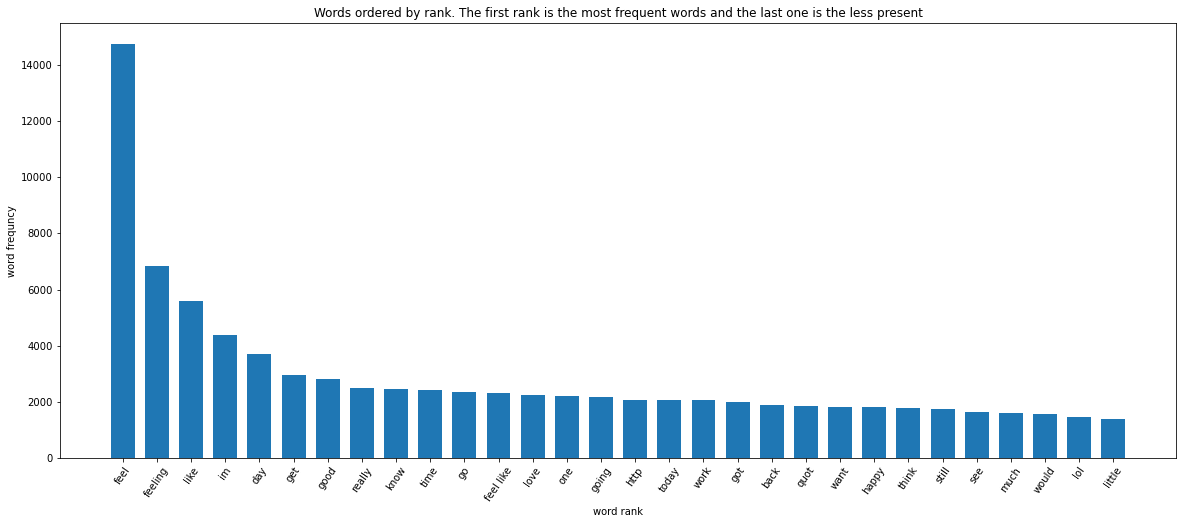

In [79]:
words = vectorizer2.get_feature_names()
wsum = np.array(X2.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot.
# take the 20 first + the rest sample with the given step 
def subsample(x):
    return np.hstack((x[:30]))


plt.figure(figsize=(20,8))
freq = subsample(wrank)
r = np.arange(len(freq))
plt.bar(r, freq, width=0.7)
plt.xticks(r, subsample(labels), rotation=55)
plt.xlabel('word rank')
plt.ylabel('word frequncy')
plt.title("Words ordered by rank. The first rank is the most frequent words and the last one is the less present")

### Split set

In [80]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, targets2, test_size=0.2, random_state=0)

print("x_train :", np.size(x_train2))
print("x_test :", np.size(x_test2))
print("ratio :", round(np.size(x_test2)/(np.size(x_train2)+np.size(x_test2))*100))

x_train : 747701
x_test : 188857
ratio : 20


### Logistic regression

In [81]:
logistic_regression2 = LogisticRegression(max_iter =1000)
logistic_regression2.fit(x_train2, y_train2)

# Prediction
pred2 = logistic_regression2.predict(x_test2)

# percent score
score = logistic_regression2.score(x_test2, y_test2)
print(round(score, 3))

0.524


In [82]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

       anger       0.88      0.77      0.82       616
     boredom       0.00      0.00      0.00        37
       empty       0.10      0.01      0.01       158
  enthusiasm       0.11      0.01      0.01       166
        fear       0.44      0.49      0.46      2235
         fun       0.18      0.05      0.08       352
       happy       0.64      0.68      0.66      2459
        hate       0.43      0.19      0.26       258
        love       0.57      0.46      0.51      1109
     neutral       0.34      0.60      0.44      1689
      relief       0.31      0.07      0.12       317
     sadness       0.66      0.65      0.65      2272
    surprise       0.46      0.20      0.28       624

    accuracy                           0.52     12292
   macro avg       0.39      0.32      0.33     12292
weighted avg       0.52      0.52      0.51     12292



### SVM

In [85]:
clf2 = svm.SVC()
clf2.fit(x_train2, y_train2)
pred2 = clf2.predict(x_test2)
score = clf2.score(x_test2, y_test2)
print(round(score, 3))

0.483


In [86]:
print(classification_report(y_test2, pred2))

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.92      0.47      0.63       616
     boredom       0.00      0.00      0.00        37
       empty       0.00      0.00      0.00       158
  enthusiasm       0.00      0.00      0.00       166
        fear       0.39      0.51      0.44      2235
         fun       0.00      0.00      0.00       352
       happy       0.52      0.72      0.60      2459
        hate       0.52      0.09      0.15       258
        love       0.60      0.31      0.41      1109
     neutral       0.33      0.59      0.42      1689
      relief       0.60      0.01      0.02       317
     sadness       0.68      0.58      0.63      2272
    surprise       0.69      0.07      0.13       624

    accuracy                           0.48     12292
   macro avg       0.41      0.26      0.26     12292
weighted avg       0.51      0.48      0.45     12292



### SVM OneVsOne classifier

In [87]:
oneVsOne2 = OneVsOneClassifier(LinearSVC())
oneVsOne2.fit(x_train2, y_train2)
pred2 = oneVsOne2.predict(x_test2)

score = oneVsOne2.score(x_test2, y_test2)
print('Socre : ',round(score, 3))

/home/hachem/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Socre :  0.507


In [88]:
print(classification_report(y_test2, pred2))

              precision    recall  f1-score   support

       anger       0.85      0.80      0.82       616
     boredom       0.00      0.00      0.00        37
       empty       0.14      0.03      0.05       158
  enthusiasm       0.07      0.01      0.01       166
        fear       0.43      0.46      0.45      2235
         fun       0.19      0.09      0.12       352
       happy       0.63      0.65      0.64      2459
        hate       0.37      0.20      0.26       258
        love       0.54      0.46      0.50      1109
     neutral       0.34      0.57      0.42      1689
      relief       0.17      0.07      0.10       317
     sadness       0.64      0.62      0.63      2272
    surprise       0.39      0.20      0.26       624

    accuracy                           0.51     12292
   macro avg       0.37      0.32      0.33     12292
weighted avg       0.50      0.51      0.50     12292



### Confusion matrix

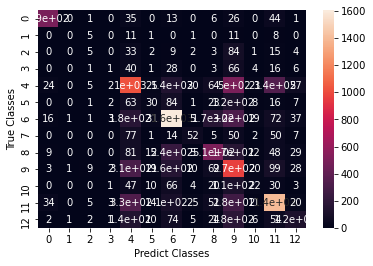

In [89]:
sns.heatmap(confusion_matrix(y_test2, pred2), annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predict Classes')
plt.show()

### Use pipline

In [90]:
pipe0 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])

pipe1 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('svml', LinearSVC()),
])
pipe2 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('mult_nb', MultinomialNB()),
])
pipe3 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('bern_nb', BernoulliNB()),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('logit', LogisticRegression(max_iter = 1000)),
])
pipe5 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('sgd', SGDClassifier()),
])

pipe6 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('svml', LinearSVC()),
])
pipe7 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('bern_nb', BernoulliNB()),
])
pipe8 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('mult_nb', MultinomialNB()),
])
pipe9 = Pipeline([
    ('vect', CountVectorizer(stop_words = stop_words, ngram_range = (1, 2))),
    ('tfidf', TfidfTransformer()),
    ('logit', LogisticRegression(max_iter = 1000)),
])
def run_pipes2(pipes, splits=10, test_size=0.2, seed=0):  
    res3 = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus2):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train2 = corpus2[idx_train]
            X_test2 = corpus2[idx_test]
            y_train2 = targets2[idx_train]
            y_test2 = targets2[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train2, y_train2)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test2)
            res3[name].append([
                fit_time,
                f1_score(y_test2, y, average = 'micro'),
                precision_score(y_test2, y,average='micro'),
                recall_score(y_test2, y, average='micro')
            ])
    return res3

def print_table2(res3):
    # Compute mean and std
    final = {}
    for model in res3:
        arr = np.array(res3[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": arr[:,1].mean().round(3),
            "Precision" : arr[:,2].mean().round(3),
            "Recall" : arr[:,3].mean().round(3)
        }

    df2 = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df2

In [91]:
# run base pipes withtout tfid
res5 = run_pipes2([pipe0, pipe1, pipe2, pipe3, pipe4, pipe5], splits=1)

In [92]:
print_table2(res5)

time  f1_score  Precision  Recall
vect-sgd        4.98     0.522      0.522   0.522
vect-svml      69.48     0.505      0.505   0.505
vect-mult_nb    2.63     0.435      0.435   0.435
vect-bern_nb    2.70     0.382      0.382   0.382
vect-logit    203.83     0.524      0.524   0.524

In [93]:
# run base pipes witht tfid
res6 = run_pipes2([pipe6, pipe7, pipe8, pipe9], splits=1)

In [94]:
print_table2(res6)

time  f1_score  Precision  Recall
vect-tfidf-svml       7.93     0.513      0.513   0.513
vect-tfidf-bern_nb    2.35     0.382      0.382   0.382
vect-tfidf-mult_nb    2.34     0.421      0.421   0.421
vect-tfidf-logit    218.13     0.510      0.510   0.510